# SuperStore Sales Analysis

## Objective
- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the most selling products?
- Which is the most preferred ship mode?
- Which are the most profitable categories and sub categories?

---

#### Importing necessary libraries

In [3]:
# data manipulation
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Importing Dataset

In [4]:
df = pd.read_excel('superstore_sales.xlsx')

#### Data Audit

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [7]:
df.shape

(51290, 21)

In [8]:
# dataset columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [10]:
# checking missing values 
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [11]:
# now we check the desciptive statistical summary of our dataset
df.describe().round()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.0,3.0,0.0,29.0,26.0,2013.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0
std,NaN,NaN,488.0,2.0,0.0,174.0,57.0,1.0


# Exploratory Data Analysis 

#### What is the overall sales trend?

In [12]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [13]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [14]:
# Getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [15]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [16]:
# grouping the sales with respect to month year
df.groupby('month_year')['sales'].sum().reset_index()

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


In [17]:
df_trend = df.groupby('month_year')['sales'].sum().reset_index()

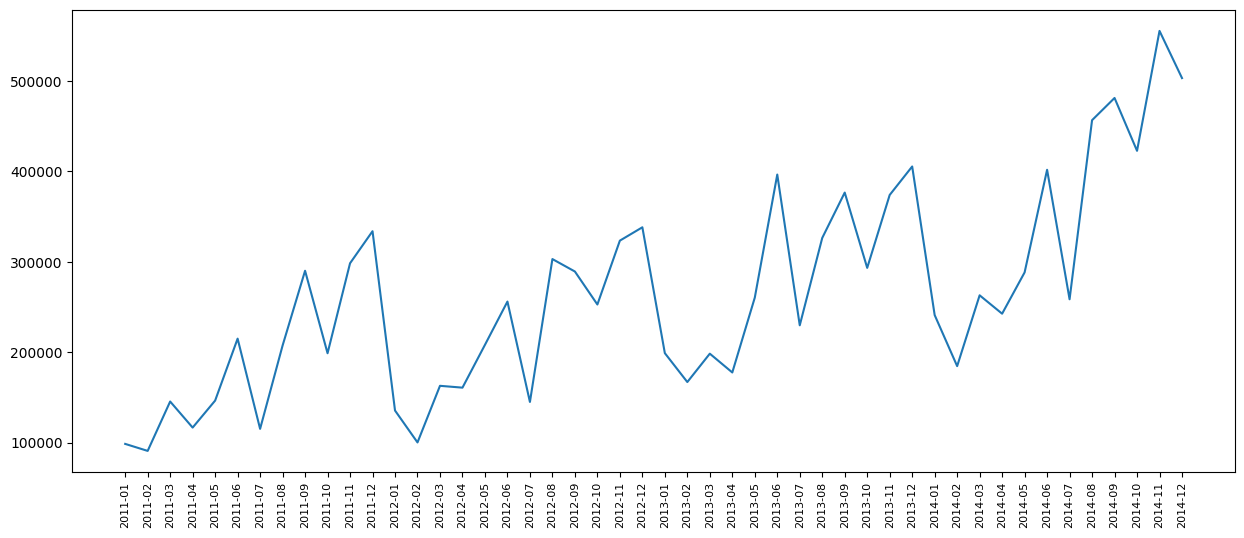

In [18]:
# setting the figure size
plt.figure(figsize=(15,6))

#tilting the x axis values for better visiblity
plt.xticks(rotation='vertical', size=8)

# plottong the matplotlib graph
plt.plot(df_trend['month_year'], df_trend['sales'])

The overall sales trend is that every year, the inital 4 months the sales are lower compared to upcoming months, and overall the company's sales are growing. 

#### Which are the top 10 products by sales?

In [19]:
df['product_name']

0                                    Tenex Lockers, Blue
1                               Acme Trimmer, High Speed
2                                Tenex Box, Single Width
3                            Enermax Note Cards, Premium
4                             Eldon Light Bulb, Duo Pack
                              ...                       
51285    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl
51286            Wilson Jones Hole Reinforcements, Clear
51287             Hon Color Coded Labels, 5000 Label Set
51288             Hon Legal Exhibit Labels, Alphabetical
51289                                Bagged Rubber Bands
Name: product_name, Length: 51290, dtype: object

In [20]:
# grouping product name columns
prod_sales = df.groupby('product_name')['sales'].sum().reset_index()

In [21]:
#sorting the product names according to the highest sales
prod_sale = prod_sales.sort_values('sales', ascending=False)

In [22]:
#fetching the first 10 rows
prod_sale[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


The above given products are the top 10 products that bring in the most sales. 

#### Which are the most selling products. 

In [23]:
most_sold_products = df.groupby('product_name')['quantity'].sum().reset_index()

In [24]:
most_sold_products.sort_values('quantity', ascending=False)

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
...,...,...
2734,Penpower WorldCard Pro Card Scanner,1
797,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
679,Boston 1900 Electric Pencil Sharpener,1
3707,Xerox 20,1


In [25]:
most_sold_products = most_sold_products.sort_values('quantity', ascending=False)

In [26]:
most_sold_products[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


So here we answer our third question of which are the top 10 most selling products. 

#### Which is the most preferred ship mode?

<Axes: xlabel='count', ylabel='ship_mode'>

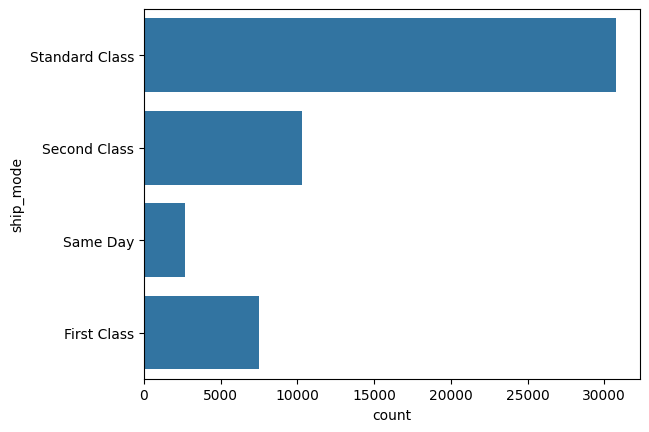

In [27]:
sns.countplot(df['ship_mode'])

Here, by a simple graph we find out the preferred top 3 ship modes which are Standard class, followed by second class and first class. 

#### Which are the most profitable category and sub category. 

In [28]:
cat_subcat_profit = df.groupby(['category','sub_category'])['profit'].sum().reset_index()

In [29]:
cat_subcat_profit.sort_values(['category','profit'], ascending=False)

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630


To summarize the last question's solution, the top 3 broad categories come out to be Technologies, Office supplies and Furniture, with Copiers, appliances and bookcases as the most profitable subcategories in each of those broad categories. 